In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

In [3]:
DATA_PATH = '../dataset/'

datasets = {
    'pesticidas': pd.read_csv(f'{DATA_PATH}pesticides.csv'),
    'precipitaciones': pd.read_csv(f'{DATA_PATH}rainfall.csv'),
    'temperatura': pd.read_csv(f'{DATA_PATH}temp.csv'),
    'rendimiento': pd.read_csv(f'{DATA_PATH}yield.csv'),
    'rendimiento_detallado': pd.read_csv(f'{DATA_PATH}yield_df.csv')
}

In [4]:
df_yield = datasets['rendimiento_detallado']
df_yield = df_yield.drop(df_yield.columns[0], axis=1)
df_yield.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [5]:
df_yield = df_yield.rename(columns={'average_rain_fall_mm_per_year': 'rain_per_year'}) #lluvia en mm
df_yield.head()

,Area,Item,Year,hg/ha_yield,rain_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [6]:
df_yield.describe()

,Year,hg/ha_yield,rain_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


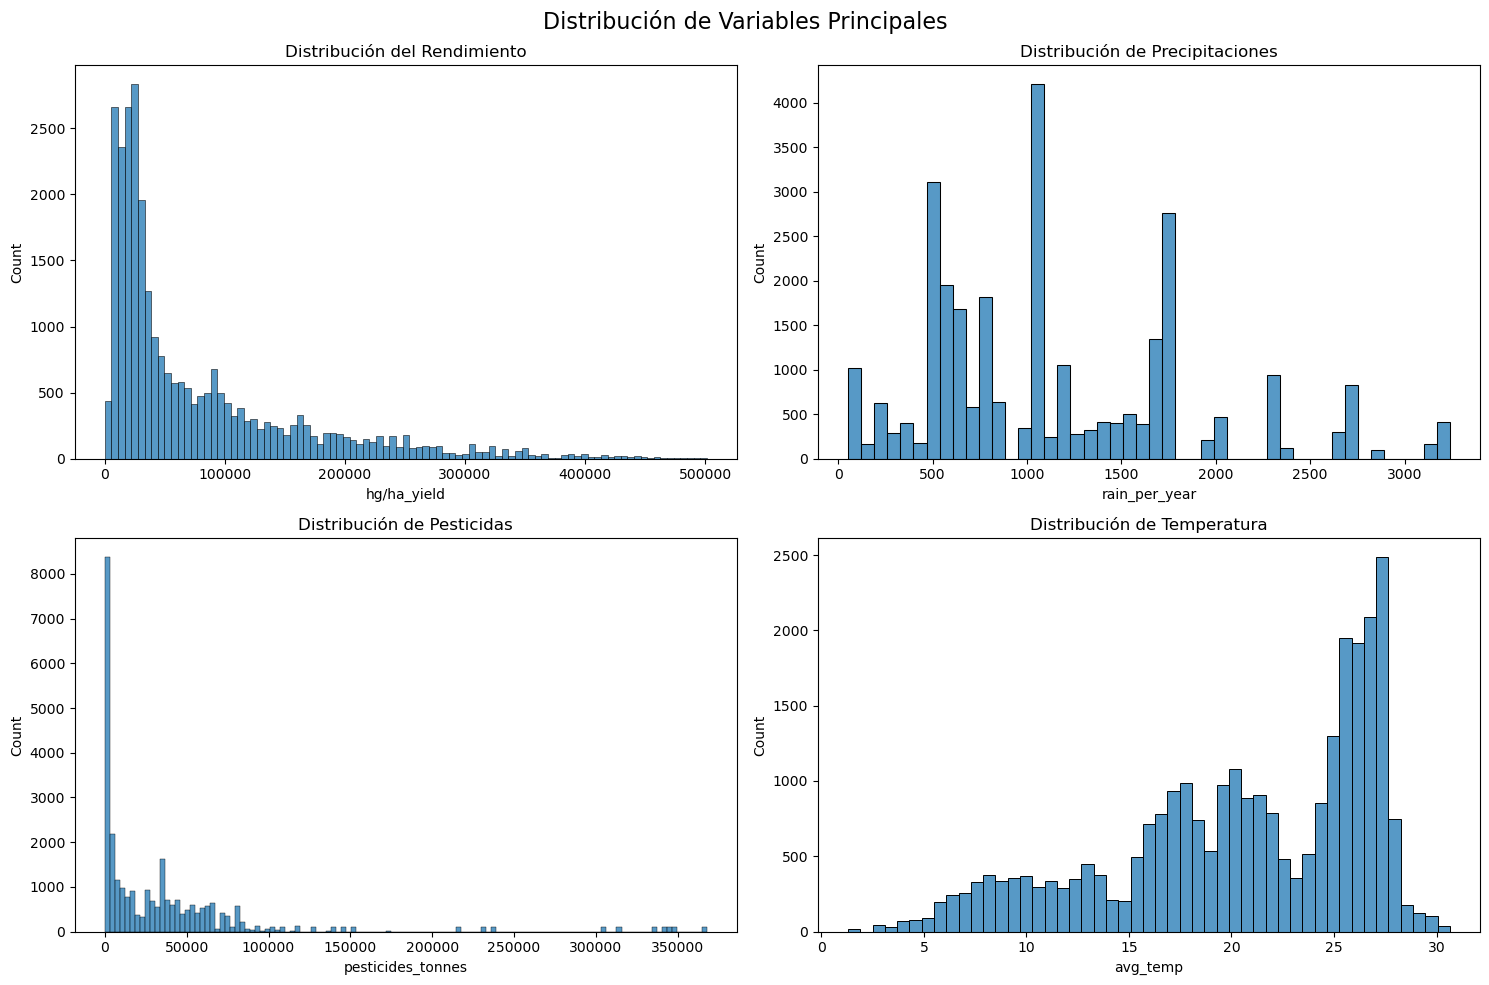

In [7]:
# Crear subplots para visualizar distribuciones
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribución de Variables Principales', fontsize=16)

# Rendimiento
sns.histplot(data=df_yield, x='hg/ha_yield', ax=axes[0,0])
axes[0,0].set_title('Distribución del Rendimiento')

# Lluvia
sns.histplot(data=df_yield, x='rain_per_year', ax=axes[0,1])
axes[0,1].set_title('Distribución de Precipitaciones')

# Pesticidas
sns.histplot(data=df_yield, x='pesticides_tonnes', ax=axes[1,0])
axes[1,0].set_title('Distribución de Pesticidas')

# Temperatura
sns.histplot(data=df_yield, x='avg_temp', ax=axes[1,1])
axes[1,1].set_title('Distribución de Temperatura')

plt.tight_layout()
plt.show()

In [8]:
df_yield.isnull().sum()


Area                 0
Item                 0
Year                 0
hg/ha_yield          0
rain_per_year        0
pesticides_tonnes    0
avg_temp             0
dtype: int64

In [9]:
datasets['pesticidas'] = datasets['pesticidas'].rename(columns={'Value': 'pesticides_value'})
df_yield = pd.merge(
    df_yield, 
    datasets['pesticidas'], 
    on=['Year', 'Area'],
    validate='m:1', 
    indicator=True   
)

# Verificar resultados del merge
print(df_yield['_merge'].value_counts())

_merge
both          28242
left_only         0
right_only        0
Name: count, dtype: int64


In [10]:
datasets['pesticidas'].head()

,Domain,Area,Element,Item,Year,Unit,pesticides_value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [12]:
df_yield = df_yield.rename(columns={'Item_x': 'Item'})
df_yield = df_yield.drop(columns=['Item_y', 'pesticides_tonnes', 'Domain', '_merge', 'Element'])
df_yield.head()

,Area,Item,Year,hg/ha_yield,rain_per_year,avg_temp,Unit,pesticides_value
0,Albania,Maize,1990,36613,1485.0,16.37,tonnes of active ingredients,121.0
1,Albania,Potatoes,1990,66667,1485.0,16.37,tonnes of active ingredients,121.0
2,Albania,"Rice, paddy",1990,23333,1485.0,16.37,tonnes of active ingredients,121.0
3,Albania,Sorghum,1990,12500,1485.0,16.37,tonnes of active ingredients,121.0
4,Albania,Soybeans,1990,7000,1485.0,16.37,tonnes of active ingredients,121.0


In [13]:
df_pes = datasets['pesticidas']
df_yield = df_yield.drop(columns=['Unit'])
df_yield = pd.merge(df_yield, df_pes, on=['Year','Area'])
df_yield.shape

(28242, 12)

In [14]:
df_yield.head()

,Area,Item_x,Year,hg/ha_yield,rain_per_year,avg_temp,pesticides_value_x,Domain,Element,Item_y,Unit,pesticides_value_y
0,Albania,Maize,1990,36613,1485.0,16.37,121.0,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.0
1,Albania,Potatoes,1990,66667,1485.0,16.37,121.0,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.0
2,Albania,"Rice, paddy",1990,23333,1485.0,16.37,121.0,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.0
3,Albania,Sorghum,1990,12500,1485.0,16.37,121.0,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.0
4,Albania,Soybeans,1990,7000,1485.0,16.37,121.0,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.0


In [15]:
df_yield = df_yield.drop(columns=['Domain', 'Element', 'Item_y', 'Unit', 'pesticides_value_x', 'pesticides_value_y'])
df_yield.head(10)

,Area,Item_x,Year,hg/ha_yield,rain_per_year,avg_temp
0,Albania,Maize,1990,36613,1485.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,16.37
5,Albania,Wheat,1990,30197,1485.0,16.37
6,Albania,Maize,1991,29068,1485.0,15.36
7,Albania,Potatoes,1991,77818,1485.0,15.36
8,Albania,"Rice, paddy",1991,28538,1485.0,15.36
9,Albania,Sorghum,1991,6667,1485.0,15.36


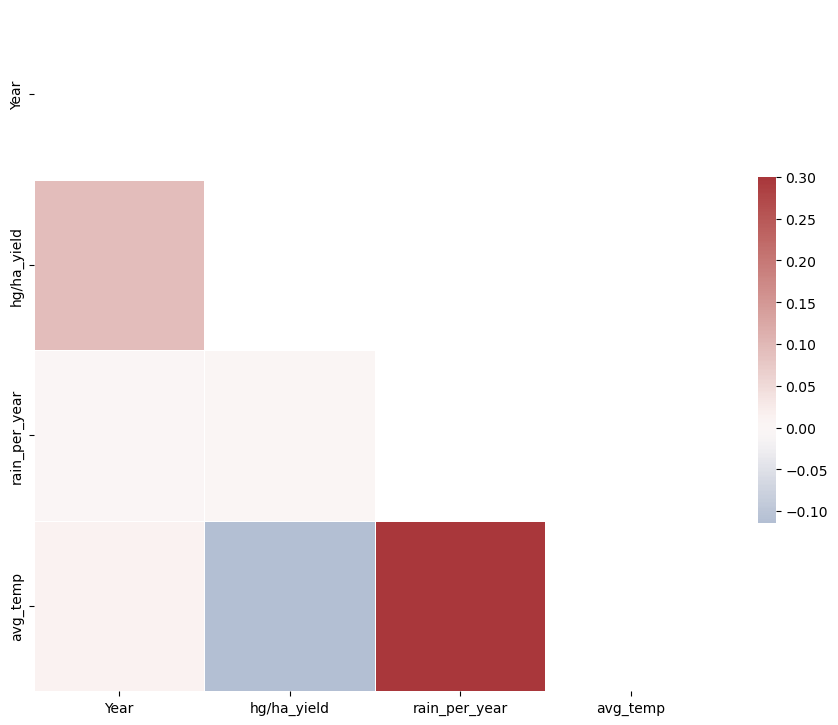

In [18]:
import sklearn
correlation_data=df_yield.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [21]:
from sklearn.preprocessing import OneHotEncoder
yield_df_onehot = pd.get_dummies(df_yield, 
                                columns=['Area', "Item_x"], 
                                prefix=['Country', "Item"],
                                dtype=int)
features=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield']
label=df_yield['hg/ha_yield']
features.head()

,Year,rain_per_year,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,16.37,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,1485.0,16.37,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,1485.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,1485.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,1485.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)

models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
    RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    svm.SVR(),
    DecisionTreeRegressor()
]

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    return {
        'model_name': model.__class__.__name__,
        'r2': r2,
        'rmse': rmse,
        'mae': mae,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }

dt_optimized = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

results = []
for model in [dt_optimized] + models:
    result = evaluate_model(model, train_data, test_data, train_labels, test_labels)
    results.append(result)

for r in results:
    print(f"\nModel: {r['model_name']}")
    print(f"R² Score: {r['r2']:.4f}")
    print(f"RMSE: {r['rmse']:.2f}")
    print(f"MAE: {r['mae']:.2f}")
    print(f"CV Score: {r['cv_mean']:.4f} (+/- {r['cv_std']*2:.4f})")


Model: DecisionTreeRegressor
R² Score: 0.7832
RMSE: 40086.97
MAE: 25453.49
CV Score: 0.7750 (+/- 0.0336)

Model: GradientBoostingRegressor
R² Score: 0.8912
RMSE: 28399.62
MAE: 18351.34
CV Score: 0.8858 (+/- 0.0148)

Model: RandomForestRegressor
R² Score: 0.6779
RMSE: 48858.48
MAE: 32540.70
CV Score: 0.6651 (+/- 0.0275)

Model: SVR
R² Score: -0.2049
RMSE: 94502.34
MAE: 57664.42
CV Score: -0.2059 (+/- 0.0161)

Model: DecisionTreeRegressor
R² Score: 0.9812
RMSE: 11815.83
MAE: 3946.13
CV Score: 0.9776 (+/- 0.0031)


In [27]:
from sklearn.preprocessing import LabelEncoder
datacorr = df_yield.copy()
categorical_columns = datacorr.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    datacorr[column] = label_encoder.fit_transform(datacorr[column])

<Axes: >

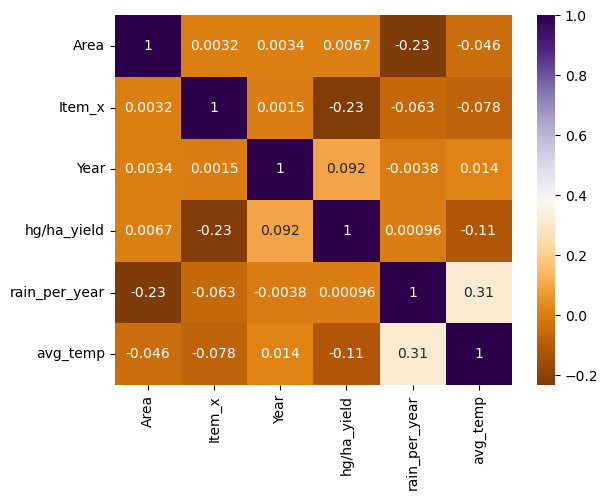

In [28]:
sns.heatmap(datacorr.corr() , annot= True , cmap='PuOr')

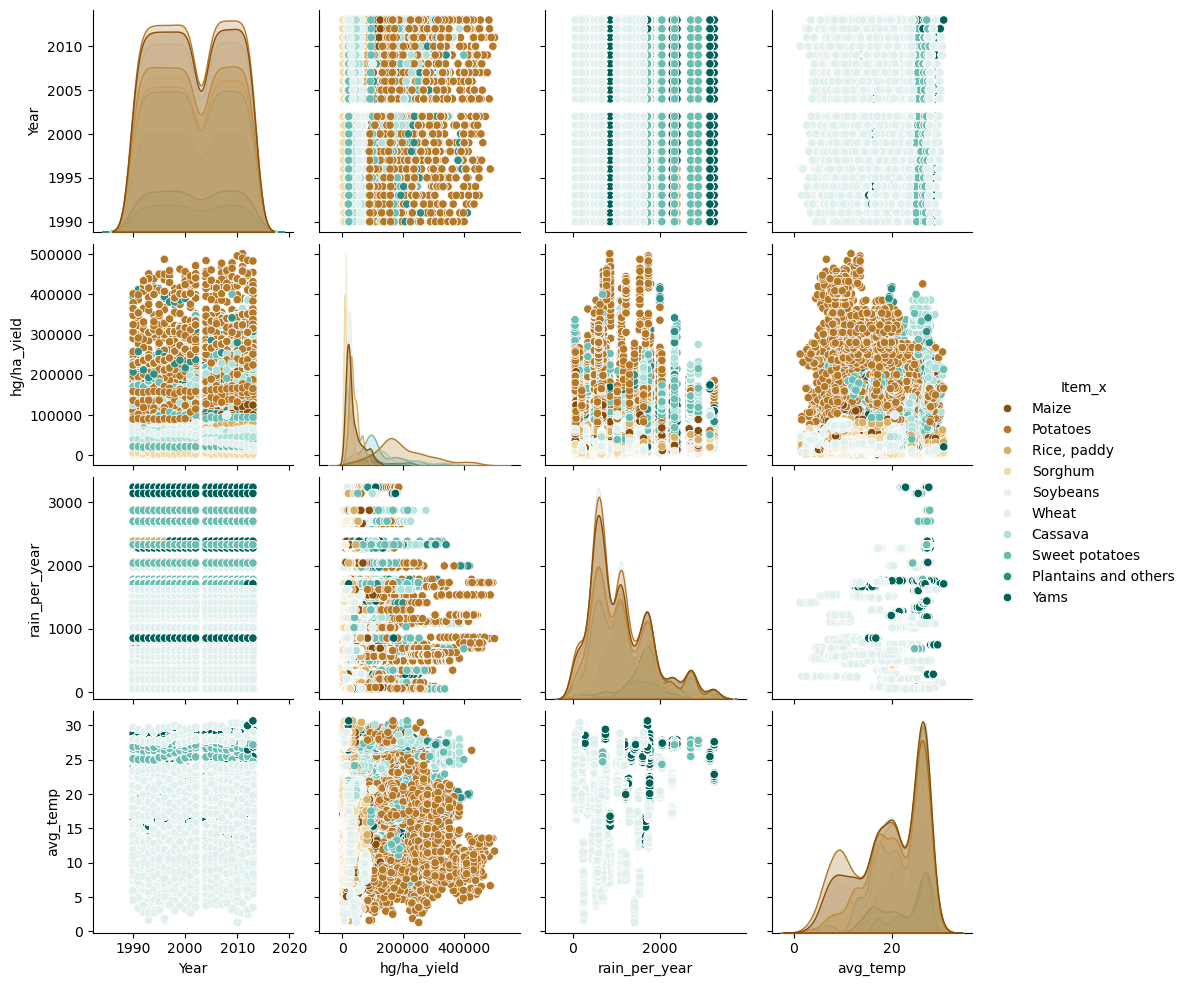

In [30]:
sns.pairplot(data=df_yield,hue='Item_x',kind='scatter',palette='BrBG')

<Axes: xlabel='Year'>

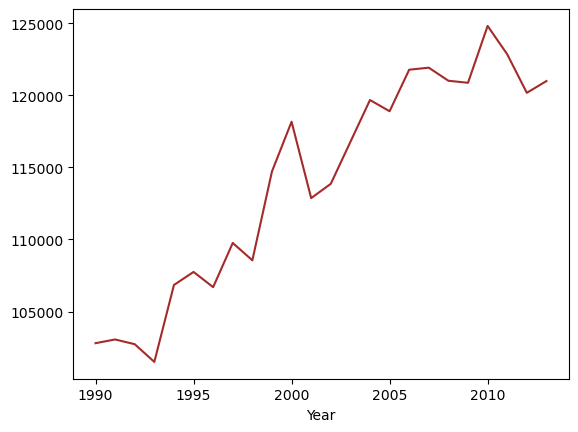

In [32]:

df2=df_yield[df_yield['Item_x']=='Yams']
df2.groupby('Year')['hg/ha_yield'].mean().plot(color='brown')

Estadísticas de rendimiento en Argentina:
count       368.000000
mean      89304.434783
std       77586.575464
min       17212.000000
25%       33039.750000
50%       57267.000000
75%      107010.000000
max      293744.000000
Name: hg/ha_yield, dtype: float64


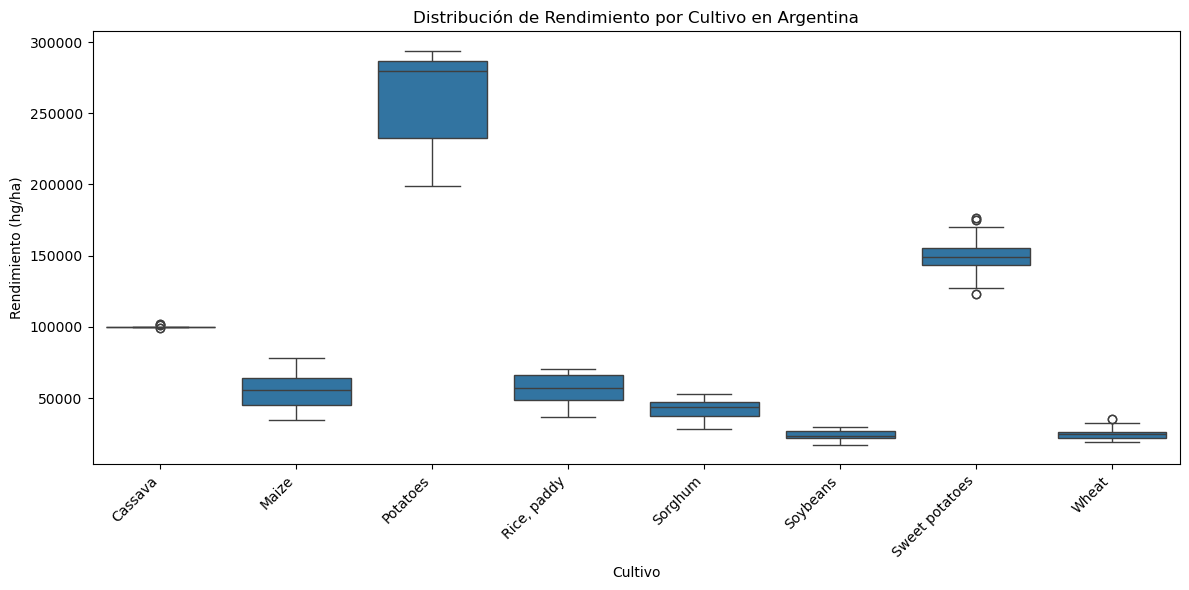

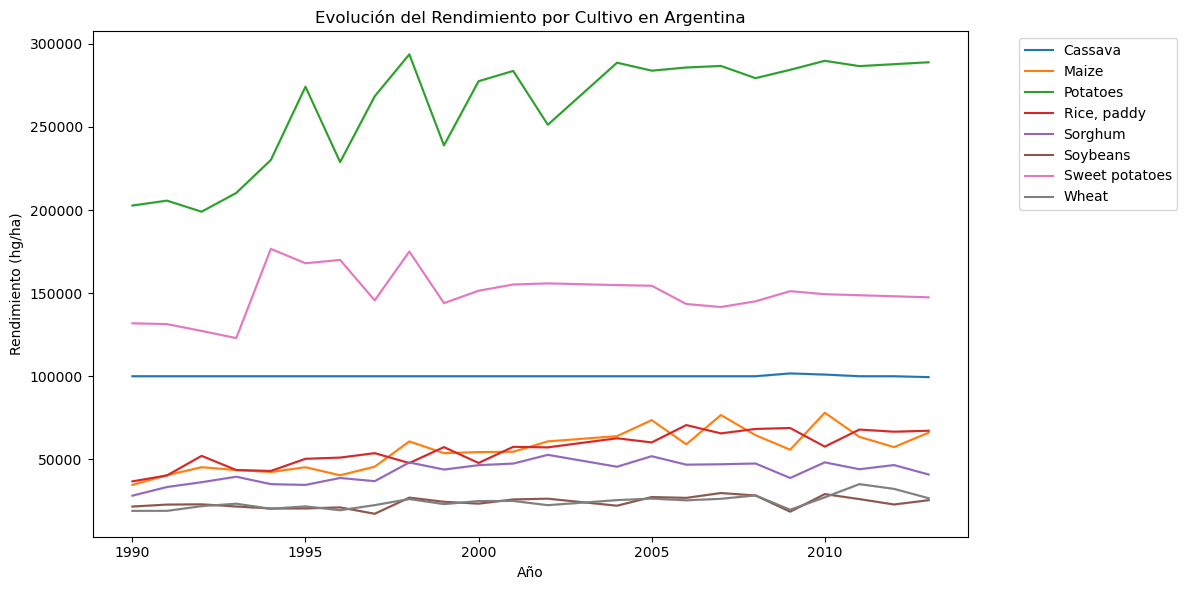


Resumen por cultivo:
                         mean           std     min     max
Item_x                                                     
Cassava         100093.652174    419.734266   99459  101695
Maize            55650.347826  11931.877206   34608   78040
Potatoes        262059.173913  32625.726792  199039  293744
Rice, paddy      56250.695652   9944.538590   36709   70610
Sorghum          42521.565217   6354.096050   28116   52691
Soybeans         23940.782609   3327.673114   17212   29712
Sweet potatoes  149563.130435  13815.233239  122955  176667
Wheat            24356.130435   4022.652075   18947   35063


In [ ]:
# Filtrar datos para Argentina
df_argentina = df_yield[df_yield['Area'] == 'Argentina']
print("Estadísticas de rendimiento en Argentina:")
print(df_argentina['hg/ha_yield'].describe())

# rendimiento por cultivo
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_argentina, x='Item_x', y='hg/ha_yield')
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de Rendimiento por Cultivo en Argentina')
plt.xlabel('Cultivo')
plt.ylabel('Rendimiento (hg/ha)')
plt.tight_layout()
plt.show()

# Evolucion temporal
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_argentina, x='Year', y='hg/ha_yield', hue='Item_x')
plt.title('Evolución del Rendimiento por Cultivo en Argentina')
plt.xlabel('Año')
plt.ylabel('Rendimiento (hg/ha)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


print(df_argentina.groupby('Item_x')['hg/ha_yield'].agg(['mean', 'std', 'min', 'max']))

The accuracy of the Linear Regression Model Train is 7.65
The accuracy of the  Linear Regression Model Test is 8.13


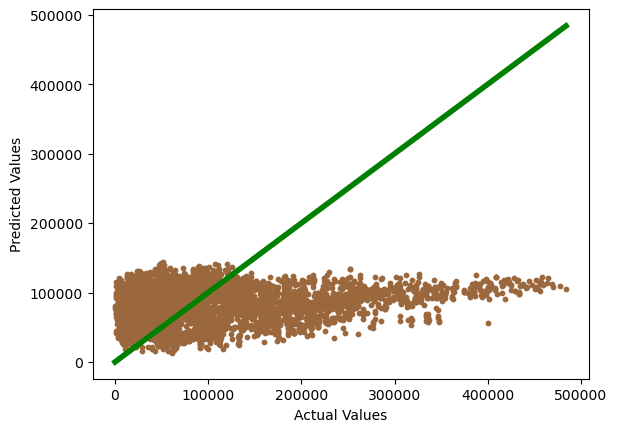

The accuracy of the Random Forest Model Train is 99.80
The accuracy of the  Random Forest Model Test is 98.64


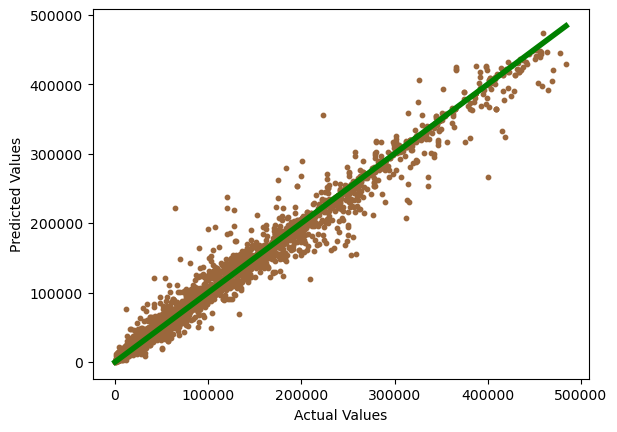

The accuracy of the Gradient Boost Model Train is 79.28
The accuracy of the  Gradient Boost Model Test is 79.66


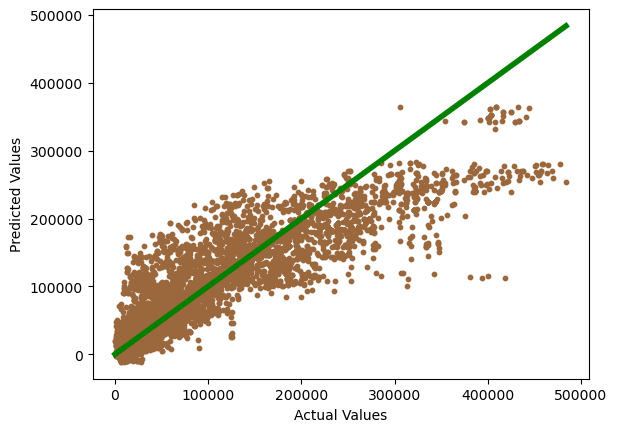

The accuracy of the XGBoost Model Train is 98.54
The accuracy of the  XGBoost Model Test is 97.54


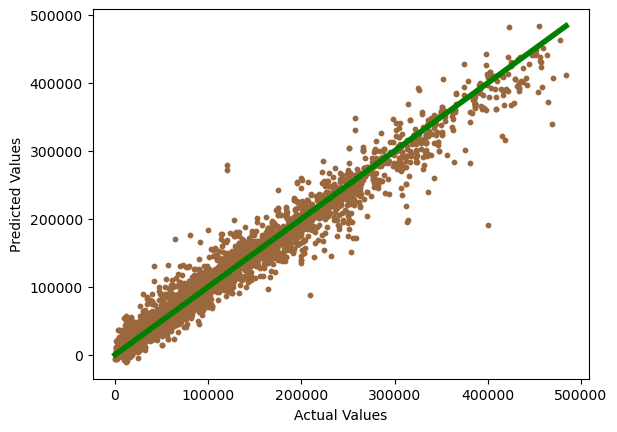

The accuracy of the KNN Model Train is 75.68
The accuracy of the  KNN Model Test is 60.50


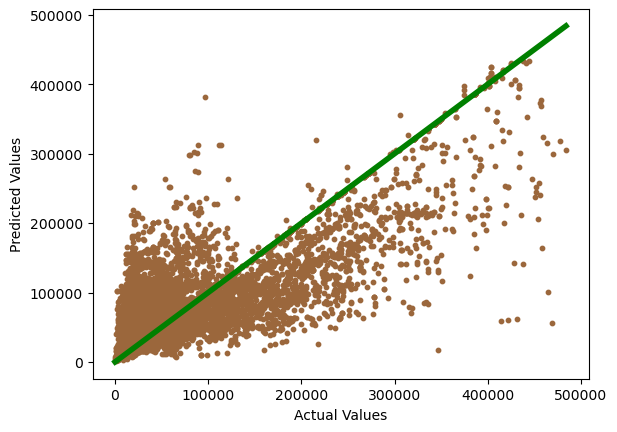

The accuracy of the Decision Tree Model Train is 100.00
The accuracy of the  Decision Tree Model Test is 97.54


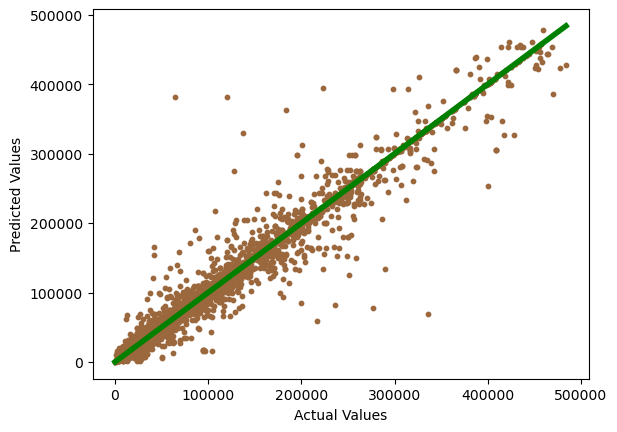

The accuracy of the Bagging Regressor Model Train is 99.80
The accuracy of the  Bagging Regressor Model Test is 98.65


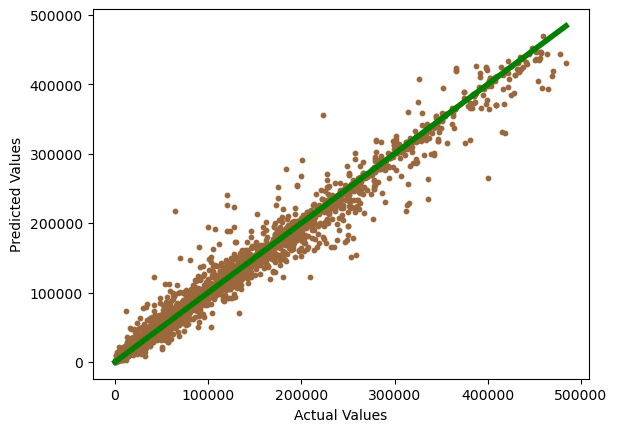

,Model,Accuracy,MSE,R2_score
0,Linear Regression,0.081325,6809355409.970077,0.081325
1,Random Forest,0.986407,100751069.647962,0.986407
2,Gradient Boost,0.796582,1507763839.854725,0.796582
3,XGBoost,0.975402,182327008.000000,0.975402
4,KNN,0.604998,2927815096.817099,0.604998
5,Decision Tree,0.975433,182093023.140210,0.975433
6,Bagging Regressor,0.986455,100395225.723865,0.986455


In [ ]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

X, y = datacorr.drop(labels='hg/ha_yield', axis=1), datacorr['hg/ha_yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN',KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree',DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor',BaggingRegressor(n_estimators=150, random_state=42))
          ]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))
    acc = (model.score(X_train , y_train)*100)
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc =(model.score(X_test , y_test)*100)
    print(f'The accuracy of the  {name} Model Test is {acc:.2f}')    
    plt.scatter(y_test, y_pred,s=10,color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
    plt.show()

dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
df_styled_best = dff.style.highlight_max(subset=['Accuracy','R2_score'], color='green').highlight_min(subset=['MSE'], color='green').highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

# df_styled_worst = dff.style.highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

display(df_styled_best)


In [40]:
df_yield.to_csv('dataset/yiel_proc.csv', index=False)